In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
df = pd.read_csv("diamonds.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [110]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Cut

In [111]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [112]:
df["cut"].nunique()

5

In [113]:
cut_dict = dict(zip(list(df["cut"].unique()), list(range(0, df["cut"].nunique()))))

In [114]:
df["cut"] = df["cut"].apply(lambda x: cut_dict[x])

In [115]:
df.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [116]:
color_dict = dict(zip(list(df["color"].unique()), list(range(0, df["color"].nunique()))))

In [117]:
df["color"] = df["color"].apply(lambda x: color_dict[x])

In [118]:
df["clarity"].nunique()

8

In [119]:
clarity_dict = dict(zip(list(df["clarity"].unique()), list(range(0, df["clarity"].nunique()))))

In [120]:
df["clarity"] = df["clarity"].apply(lambda x: clarity_dict[x])

<AxesSubplot:>

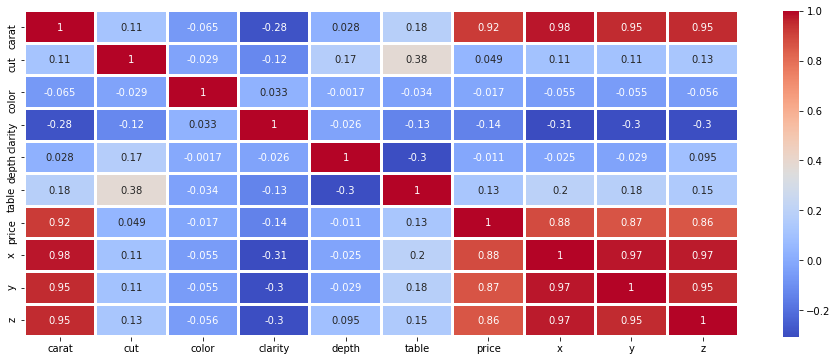

In [121]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="white", linewidths=2, cmap="coolwarm")

In [122]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31


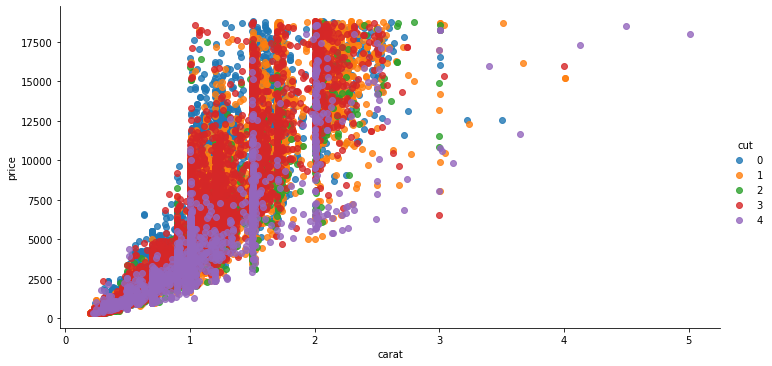

In [123]:
sns.lmplot(x = "carat", y = "price",
           data= df, fit_reg=False, 
           hue="cut", height= 5, aspect=2)

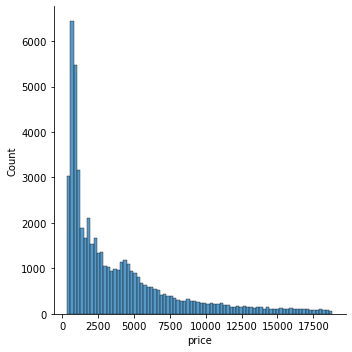

In [124]:
sns.displot(x = df["price"])

In [125]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74


## Clustering 
- since the diamonds are not classified we will use a clustering approach to attempt to classify 

In [126]:
from sklearn.cluster import KMeans

In [127]:
k_means = KMeans(n_clusters=8)

In [132]:
k_means.fit(df.drop("clarity", axis=1))

KMeans()

In [133]:
k_means.labels_

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(k_means.labels_, df["clarity"]))

              precision    recall  f1-score   support

           0       0.19      0.09      0.12     20010
           1       0.03      0.22      0.06      1898
           2       0.09      0.09      0.09      7941
           3       0.07      0.26      0.12      3480
           4       0.01      0.04      0.02      1560
           5       0.16      0.05      0.08     10973
           6       0.16      0.02      0.04      5542
           7       0.05      0.04      0.04      2536

    accuracy                           0.09     53940
   macro avg       0.10      0.10      0.07     53940
weighted avg       0.14      0.09      0.09     53940



In [136]:
errorRate = []
for i in range(1,10):
    kclu = KMeans(n_clusters=i)
    kclu.fit(df.drop("clarity", axis=1))
    errorRate.append(np.mean(kclu.labels_ != df["clarity"]))
    

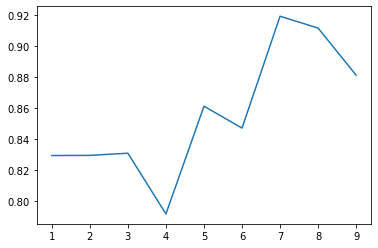

In [139]:
plt.plot(range(1,10), errorRate)

In [140]:
kclu = KMeans(n_clusters=4)
kclu.fit(df.drop("clarity", axis=1))

KMeans(n_clusters=4)

In [142]:
df["target"] = kclu.labels_

<AxesSubplot:xlabel='target', ylabel='count'>

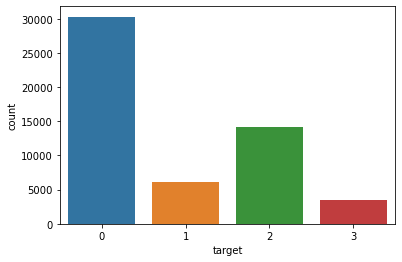

In [144]:
sns.countplot(x = df["target"])

In [153]:
X = df.drop(["clarity","target"], axis=1)
y = df["target"]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [155]:
log_mod = LogisticRegression(n_jobs=400)

In [156]:
log_mod.fit(X_train, y_train)

LogisticRegression(n_jobs=400)

In [157]:
prediciton = log_mod.predict(X_test)

In [158]:
print(classification_report(prediciton, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9088
           1       0.98      0.96      0.97      1788
           2       0.99      0.98      0.99      4303
           3       0.98      0.99      0.98      1003

    accuracy                           0.99     16182
   macro avg       0.98      0.98      0.98     16182
weighted avg       0.99      0.99      0.99     16182



In [182]:
from random import randint
randomIndex = randint(0, len(df))
randomDiamond = df.drop(["clarity","target"], axis=1).iloc[randomIndex]

In [183]:
randomDiamond

carat      0.36
cut        0.00
color      5.00
depth     61.40
table     55.00
price    571.00
x          4.61
y          4.64
z          2.84
Name: 4058, dtype: float64

In [184]:
X_train.shape

(37758, 9)

In [185]:
randomDiamond = randomDiamond.values.reshape(1,9)

In [186]:
log_mod.predict(randomDiamond)

array([0], dtype=int32)

In [187]:
df.iloc[randomIndex]["target"]

0.0